In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [31]:
path = '../input/glioblastoma-radiosensitivity-dataset/glioblastoma_data/extracted_data/cell_behaviors/videos_transcriptions_csv'
print(path)

../input/glioblastoma-radiosensitivity-dataset/glioblastoma_data/extracted_data/cell_behaviors/videos_transcriptions_csv


In [32]:
def import_files(path):
    struc = pd.DataFrame(columns =["radiation_level", "path","code_file","group"])
    read = os.walk(path)
    for root, dirs, files in read:
        for name in files:
            if name.endswith(".csv"):
                #print(name)
                radiation = name.split("gy")
                [_,group,_] = name.split("_") 
                filepath = path+ '/' + name
                code_file = name[:-4] #removing suffix
                
                struc = struc.append({"radiation_level" : int(radiation[0]), "path" : filepath, "code_file" : code_file, "group" : group}, ignore_index=True)
                
    return struc

In [33]:
def str_to_numpy(input_str):
    """
    str_to_numpy is used to parse the columns "input" and "output" of the dataset csv files.
    It converts a string representing an array of cells to a numpy array containing strings
    which are the names of these cells.
    """
    process_str = input_str.replace("[", "")
    process_str = process_str.replace("'", "")
    process_str = process_str.replace(" ", "")
    process_str = process_str.replace("]", "")
    if(process_str != ""):
        process_str = process_str.split(",")
        output_array = np.asarray(process_str, dtype=str)
    else:
        output_array = np.asarray([], dtype=str)
    return output_array

In [34]:
file = path + "/0gy_n1_201104.nd2u2510Gy1A.csv"
data = pd.read_csv(file, converters = {"input" : str_to_numpy, "output" : str_to_numpy}) #imports a dataframe from a csv 
                  # and converts its string components to numpy
data.head()

,time,event,input,output
0,0,begin,[],[C1]
1,66,div,[C1],"[C1.1, C1.2]"
2,238,div,[C1.1],"[C1.1.1, C1.1.2]"
3,386,div,[C1.1.1],"[C1.1.1.1, C1.1.1.2]"
4,432,end,[C1.1.1.1],[]


## Algorithm :

We suppose that trees do not merge.

1. List begin events -> give us the root cells for each tree
2. Group together cells which contains the name of previous cells ("C1" and "C1.1" e.g.)
   1. Create a DataFrame with [root_cell, cell_name, time, event, input, ouput]

In [6]:
def cells_to_trees(data_frame):
    trees = pd.DataFrame(columns =["tree_id", "cells"])
    for idx in date_frame.index:
        path = data_frame.loc[idx,'path']
        file_name = data_frame.loc[idx,'code_file']
        file_path = path + "/"+ file_name + ".csv"
        experience = pd.read_csv(file_path, converters = {"input" : str_to_numpy, "output" : str_to_numpy})
        
                                        

In [8]:
# Testing function :

def event_test(row):
    """
    Test an event to check if it represents a merge
    between two trees.
    Return the root_cells of the trees that merge if it is the case.
    """
    l = []
    if(row.input.size < 2):
        return l
    for i in range(1, row.input.size):
        if(row.input[i-1][1] != row.input[i][1]):
            l.append(row.input[i-1])
            l.append(row.input[i])
    return l
    

def test(trees):
    """
    This function test all the trees in the input DataFrame
    to check if they don't merge with another three.
    Return the root_cells of the trees that merge in the experiment.
    """
    root_cells = []
    for l in trees.apply(event_test, axis=1):
        if len(l) != 0 :
            for cell in l:
                if not (cell[0:2] in root_cells):
                    root_cells.append(cell[0:2])
    return root_cells

test(data)

[]

sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config 
pip install pygraphviz

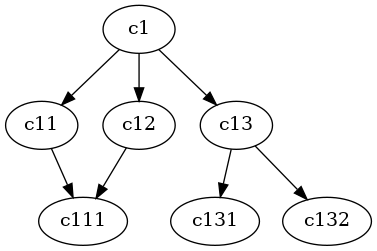

In [26]:
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   c1 -> c11 -> c111;
   c1 -> c12
   c1 -> c13
   c13 -> c131
   c13 -> c132
   c12 -> c111
}"""
draw(g1)

In [74]:
def f(row, root):
    for c in row.input :
        if str(c).startswith(root):
            return True
    return False

def test(cells, data):
    trees = []
    for c in cells :
        g = lambda row : f(row, c)
        trees.append(data[data.apply(g, axis=1)])
    return trees

cells = ["C1", "C2", "C3"]

test(cells, data)[2]

,time,event,input,output
24,73,div,[C3],"[C3.1, C3.2]"
25,211,div,[C3.1],"[C3.1.1, C3.1.2]"
26,410,div,[C3.1.1],"[C3.1.1.1, C3.1.1.2]"
27,432,end,[C3.1.1.1],[]
28,432,end,[C3.1.1.2],[]
29,384,div,[C3.1.2],"[C3.1.2.1, C3.1.2.2]"
30,432,end,[C3.1.2.1],[]
31,432,end,[C3.1.2.2],[]
32,221,div,[C3.2],"[C3.2.1, C3.2.2]"
33,348,div,[C3.2.1],"[C3.2.1.1, C3.2.1.2]"
